## Milestone 1 Project
### Assessing Climate Risk Impacts on Residential Real Estate in the United States
Team members: Riddhisha Prabhu, Lauralyn Curry-Leech and Erin Mettler</br>
### Introduction
Climate risk has become an area of increased focus for the finance industry, given the observed increase in extreme weather events and associated financial losses. Our project will focus primarily on climate risks affecting the real estate sector; we would like to assess if residential property prices are showing adverse price movements for areas that are expected to experience adverse weather with increasing frequency due to climate risk. More specifically, this project will focus on the risk of flooding in areas expected to experience rising sea levels and hence will focus on the coastal plains of the United States. Note that due to limitations in accessing commercial real estate data, at this time this project will focus only on residential real estate data. </br>
</br>
FEMA zones are generally well known to represent an increased risk of flooding and it can be reasonably expected that homeowners take such additional risks into account when considering whether to purchase a home in a FEMA zone. However, we believe that sea level rising (SLR) zones also pose a potential future risk that may not be currently appreciated by homeowners. In this project, we would like to assess whether we see the same kind of price depreciation in sea level rising zones as we do in FEMA zones.


#### Installs and Imports

In [16]:
! pip install geopandas
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Part 1: Data Downloads and Preprocessing.
As SLR and HMDA files are large and memory intensive, downloading and preprocessing steps have been seperated out into auxilary notebooks.</br>
If data has not been provided, run these files once to download and preprocess data.

In [3]:
#File downloads - if files have not been downloaded, run once and then recomment out
'''Fairly time intensive. Downloads all necessary files for HMDA Preprocessing:
Since HMDA Preprocessing is memory intensive, other files are downloaded after HMDA Preprocessing is run.
HMDA and Coastal files organized into folders in /data directory.'''
# %run Download_HMDA.ipynb

'Fairly time intensive. Downloads all necessary files for HMDA Preprocessing:\nSince HMDA Preprocessing is memory intensive, other files are downloaded after HMDA Preprocessing is run.\nHMDA and Coastal files organized into folders in /data directory.'

In [4]:
#HMDA Preprocessing - if data/results_full.zip file do not exist, run once and then recomment out
'''Warning: Requires a very large amount of memory, and a long time to run.
We calculate the median property values by state/county/censustract FIPS codes by year. 
The files for each year are then concatenated together to create the results_full.zip pickle file' '''
#%run Preprocessing_HDMA.ipynb

"Warning: Requires a very large amount of memory, and a long time to run.\nWe calculate the median property values by state/county/censustract FIPS codes by year. \nThe files for each year are then concatenated together to create the results_full.zip pickle file' "

In [5]:
#File downloads - if files have not been downloaded, run once and then recomment out
'''Fairly time intensive. Downloads all other necessary files:
FFEMA, SLR and Census files organized into folders in /data directory.'''
#%run Download_Data.ipynb

'Fairly time intensive. Downloads all other necessary files:\nFFEMA, SLR and Census files organized into folders in /data directory.'

In [6]:
#FEMA Preprocessing - if data/cleaned_FEMA.zip pickle file does not exist, run once and then recomment out
'''Runs quickly, reduces file size to below 10 mb by preprocessing.
Finds all the fema census tracts that are in Coastal Counties and saves as cleaned_FEMA.zip pickle file.'''
#%run Preprocessing_FEMA.ipynb

'Runs quickly, reduces file size to below 10 mb by preprocessing.\nFinds all the fema census tracts that are in Coastal Counties and saves as cleaned_FEMA.zip pickle file.'

In [7]:
#SLR Preprocessing - if data/SLR.csv file does not exist, run once and then recomment out
'''Might take around an hour to run, but no memory issues.
Finds all the census tracts effected by given Sea Level Rise level and saves as SLR.csv csv file.'''
#slr_feet = 1
#%run Preprocessing_SLR.ipynb

'Might take around an hour to run, but no memory issues.\nFinds all the census tracts effected by given Sea Level Rise level and saves as SLR.csv csv file.'

### Part 2: Analysis
After loading all our relevant data, we will add flags to identify SLR and FEMA census tracts to the HMDA dataframe with median home price for census tracts in coastal counties. Please see relevant Preprocessing files to see how we arrived at these final SLR, FEMA and HMDA files.</br>
</br>
This combined dataframe will allow us to then compare median home prices between FEMA, SLR and Coastal census tracts and construct meaningful visualizations.</br>

In [17]:
def depickle_data():
    """ 
    Description: this function creates the hmda, fema, and slr datasets by reading in .csv and pickle files
    I/P: None
    O/P: hmda, fema and slr datasets
    """
    df = pd.read_pickle("data/results_full.zip", compression = "zip")
    slr = pd.read_csv("data/SLR.csv", dtype = 'string')
    fema = pd.read_pickle("data/cleaned_FEMA.zip", compression = "zip")
    
    return df, slr, fema

In [18]:
df, slr, fema = depickle_data()

In [19]:
df.head(2)

,activity_year,county_code,census_tract,property_value,state_county_FIPS,county_name,state_name,ocean
0,2018,01003,01003010100,175000.0,01003,Baldwin,Alabama,Gulf of Mexico
1,2018,01003,01003010200,145000.0,01003,Baldwin,Alabama,Gulf of Mexico


In [20]:
slr.head(2)

,SLRs,STATEFP,COUNTYFP,TRACTCE,census_tract,SLR_ft
0,AL,01,097,005500,01097005500,1
1,AL,01,097,007300,01097007300,1


In [21]:
fema.head(2)

,STATE,COUNTY,STCOFIPS,TRACT,CFLD_RISKR,census_tract
5206,California,Humboldt,06023,000800,Very High,06023000800
5208,California,Humboldt,06023,001001,Relatively High,06023001001


In [22]:
def final_analysis(df, fema, slr): 
    '''Input: hmda, fema and slr dataframes
    Output: hmda dataframe with columns added to flag if census tracts are in the slr or fema datasets'''
    
    df["fema_flag"] = np.where(df.census_tract.isin(fema.census_tract),1,0)
    df["slr_flag"] = np.where(df.census_tract.isin(slr.census_tract),1,0)
    
    return df
    
final_df = final_analysis(df, fema, slr)

In [23]:
final_df.head()

,activity_year,county_code,census_tract,property_value,state_county_FIPS,county_name,state_name,ocean,fema_flag,slr_flag
0,2018,01003,01003010100,175000.0,01003,Baldwin,Alabama,Gulf of Mexico,0,1
1,2018,01003,01003010200,145000.0,01003,Baldwin,Alabama,Gulf of Mexico,0,0
2,2018,01003,01003010300,225000.0,01003,Baldwin,Alabama,Gulf of Mexico,0,1
3,2018,01003,01003010400,185000.0,01003,Baldwin,Alabama,Gulf of Mexico,0,0
4,2018,01003,01003010500,145000.0,01003,Baldwin,Alabama,Gulf of Mexico,0,0


### Visualization 1: Median Home Prices

The first visualization is a bar chart showing the national annual median home prices for single family homes in coastal zones (coastal_only), identified FEMA zones (fema), and zones that are at risk in the event of a one foot rise in sea level (SLR_only). As can be seen in Figure 1, the median home price for each of the identified zones increased with each passing year. This figure shows that the costs of homes in SLR_only zones began rising at a larger rate than those in FEMA zones beginning in 2022.</br>
</br>
This trend exemplifies that home owners want to live near the coast and are willing to take on the additional risk of living in an area that may be threatened by sea level rise in the near future, however they are not as willing to take on the additional perceived risk by living in a coastal zone that has been deemed by FEMA to be at a higher risk for floods. This trend will likely continue to grow over time as sea levels rise and as FEMA begins identifying more locations in zones that were previously SLR_only as now being at high-risk for flooding.</br>

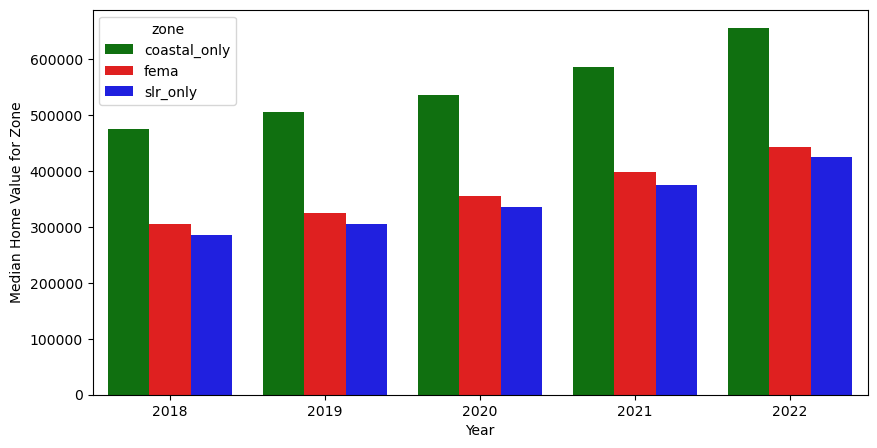

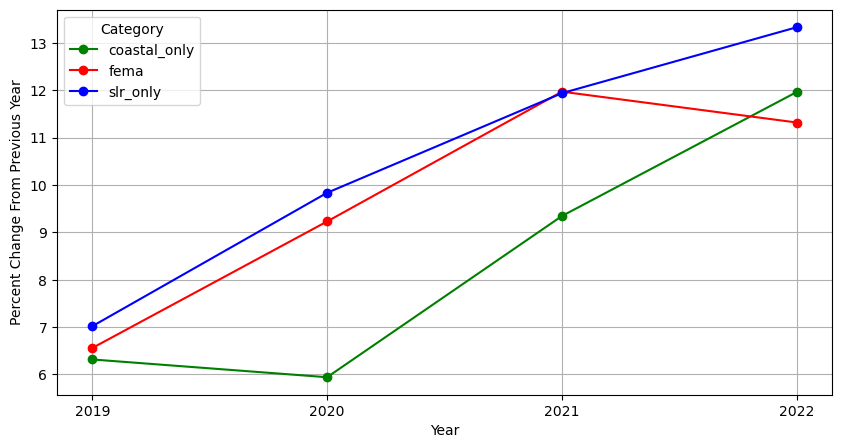

In [24]:
def plot_bar(final_df, fema, slr):
    """Description: This function creates a plot showing the median price for each zone by year.
    """
    condition_lst = [final_df.fema_flag == 1, np.logical_and(final_df.fema_flag == 0, final_df.slr_flag == 1)]
    choice_lst = ['fema', 'slr_only']
    final_df["zone"] = np.select(condition_lst, choice_lst, 'coastal_only')
    vis_df = final_df.groupby(["activity_year", "zone"], as_index=False).agg({"property_value": np.median})
    
    plt.figure(figsize=(10, 5))
    bar_colors = {"fema": "red", "slr_only": "blue", "coastal_only": "green"}
    ax = sns.barplot(data=vis_df, x="activity_year", y="property_value", hue="zone", palette=bar_colors)
    ax.set_xlabel("Year")  # Set x-axis label
    ax.set_ylabel("Median Home Value for Zone")  # Set y-axis label
    
    vis_df["percent_change"] = vis_df.groupby("zone")["property_value"].pct_change() * 100
    plt.figure(figsize=(10, 5))
    marker_colors = {"fema": "red", "slr_only": "blue", "coastal_only": "green"}
    for label, df_label in vis_df.groupby("zone"):
        plt.plot(df_label["activity_year"], df_label["percent_change"], marker='o', linestyle='-', label=label, color=marker_colors[label])
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title="Category")
    plt.gca().set_xticks([2019, 2020, 2021, 2022])
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("Percent Change From Previous Year")
    
    return

plot_bar(final_df, fema, slr)

### Visualization 2: Choropleth of Census Tracts
Since the Census shape files needed to make a choropleth are all around 10 mb or larger, we have only included the shape file for NJ. To map additional states, first run download_Census() in the Data_Download.ipynb file specifying the additional state files to download.</br>
</br>
These Choropleth Maps provide a visual location comparison for FEMA, SLR and Coastal census tracts. The first figure shows New Jersey’s state-wide coastal, SLR, and FEMA zones, the second figure shows a more detailed view of Ocean County, NJ specifically. Census tracts that are in gray at the coastal county level were omitted from the analysis as they are lacking mortgage data for one or more years in the range 2018-2022. </br>
</br>These maps help us to visualize what our data is saying, and can be used in further analysis to guide making decisions about how we might do inter-county comparisons in a future analysis. These choropleth maps exemplify that FEMA designations are outdated currently, as just with a 1 ft sea level rise there are a large number of census tracts that will be affected that do not currently have FEMA designation as having high-levels of coastal flooding risk. If these FEMA designations are updated in the future, there would likely be a shift in the year-over-year home price changes shown in previous visualizations.


In [25]:
def plot_choropleth(df,state=True):
    '''Input: df - final_df containing data for 1 state or county.
        state - False if mapping a county, otherwise True/default for state level
    Output: Plots a Choropleth of SLR, Fema, and Coastal census tracts'''
    
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(12)
    
    #
    state_name = df.state_name.iloc[0]
    county_name = df.county_name.iloc[0]
    state_fip = df.county_code.iloc[0][:2]
    
    #Creating geo_df from corresponding Census tract shapefile
    geo_df = gpd.read_file("data/Census_ShapeFiles/tl_rd22_{}_tract.shp".format(state_fip))

    #Setting title and level of mapping based on state/county
    if state:
        geo_df.plot(ax=ax, color='lightgrey')
        plt.suptitle(f'{state_name}')
    else: 
        county_tract = geo_df[geo_df.GEOID.apply(lambda x: x[:5] in (df.county_code.unique()))]
        county_tract.plot(ax=ax, color='lightgrey')
        plt.suptitle(f'{county_name} County, {state_name}')
    
    #legend: Choropleth workaround
    plt.title('SLR = Blue, Fema = Red, Coastal = Green')
    
    #Plotting Fema counties
    fema_tracts = geo_df[geo_df.GEOID.isin(df[df.fema_flag == 1].census_tract.unique())]
    fema_tracts.plot(ax=ax, color='red')
    
    #Plotting SLR counties
    slr_tracts = geo_df[geo_df.GEOID.isin(df[(df.slr_flag == 1) & (df.fema_flag == 0)].census_tract.unique())]
    slr_tracts.plot(ax=ax, color='blue')
    
    #Plotting Coastal counties
    non_slr_fema = geo_df[geo_df.GEOID.isin(df[(df.slr_flag == 0) & (df.fema_flag == 0)].census_tract.unique())]
    non_slr_fema.plot(ax=ax, color='green')
    
    ax.set_axis_off();

In [26]:
def plot_state(df,state_name):
    '''Input: df, state name
        Output: plots a choropleth of state SLR, Fema, and Coastal census tracts'''
    plot_choropleth(df[df.state_name == state_name])

In [27]:
def plot_county(df,county_name,state_name):
    '''Input: df, county name, state name
    Output: plots a choropleth of county SLR, Fema, and Coastal census tracts'''
    plot_choropleth(df[(df.county_name == county_name) & (df.state_name == state_name)],state=False)

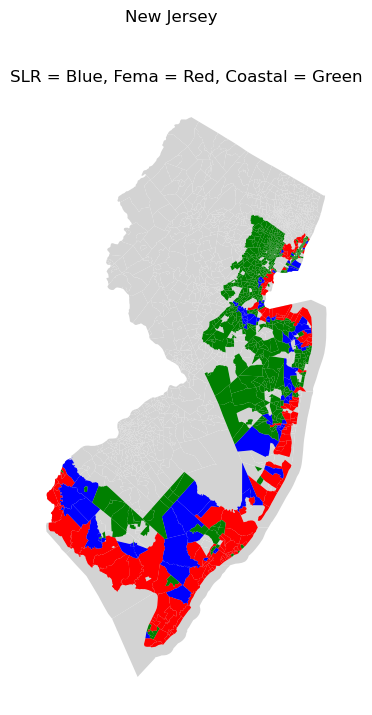

In [28]:
plot_state(final_df,'New Jersey')

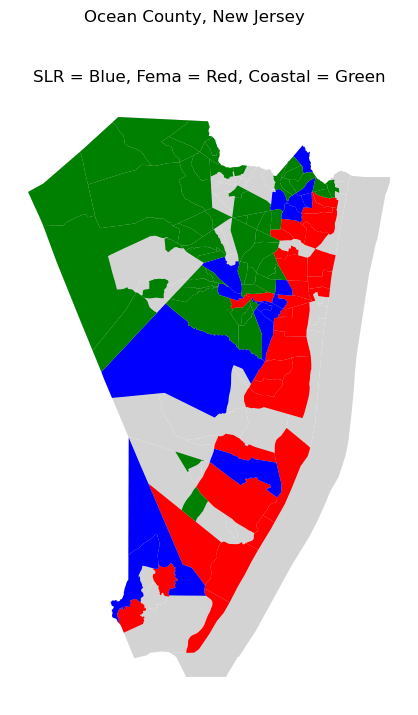

In [29]:
plot_county(final_df,"Ocean","New Jersey")

### Data References:

1. [Coastal Counties](https://www2.census.gov/library/stories/2018/08/coastline-counties-list.xlsx)

2. [HMDA data](https://ffiec.cfpb.gov/data-publication/snapshot-national-loan-level-dataset/2022)

3. [HMDA data dictionary 1](https://ffiec.cfpb.gov/documentation/publications/loan-level-datasets/lar-data-fields) and [data dictionary 2](https://ffiec.cfpb.gov/documentation/publications/loan-level-datasets/lar-data-fields-v1)

4. [FEMA dataset](https://hazards.fema.gov/nri/Content/StaticDocuments/DataDownload//NRI_Table_CensusTracts/NRI_Table_CensusTracts.zip)

5. [SLR geospatial datasets](https://chs.coast.noaa.gov/htdata/Inundation/SLR/SLRdata/)

6. [Census Tract geospatial datasets](https://www2.census.gov/geo/tiger/TIGER_RD18/LAYER/TRACT/)